# Real Time Gait Asymmetry Detection  

In this notebook we are going to achieve the following:

1. **Create the Training Dataset**: We will preprocess and combine data from different sources to create a comprehensive training dataset for real time gait asymmetry detection.
2. **Feature Selection and Dimensionality Reduction**: We will identify the most relevant features for real time gait asymmetry detection using dimensionality reduction techniques.
3. **Model Evaluation**: We will test and compare the performance of multiple machine learning and deep learning algorithms for real time gait asymmetry detection.

In [1]:
# Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GroupKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from feature_extraction import generate_rolling_windows
from data_preprocessing import clean_extra_files, detection_merge_subject_features, detection_merge_raw_npz_files, detection_merge_csv_datasets, detection_merge_npz_datasets

# Constants
base_dir    = 'Data'
healthy_dir = 'Data/Healthy'
stroke_dir  = 'Data/Stroke'

detection_time_domain_name = 'detection_time_domain.csv'
detection_asymmetry_name   = 'detection_asymmetry.csv'

## Data Preprocessing, Feature Selection and Dimensionality Reduction

The first step is to create the dataset for the gait asymmetry and extract meaningful features from raw data. The goal is to create a set of different datasets that will provide a holistic view and different insights that we can use with the aim of creating a model that will provide a real time gait asymmetry detection. The process here includes the following steps:
1. Create a new base dataset that includes data in 2 second windows and a 1 second stride.
2. Extract simple statistic features from the 2 second signal like max, min and std. The simple statistics proved to be meaningful information for the classification task.
3. Extract a set of simple symmetry and asymmetry features from swing and stride times.

The data provided were designed for classification, since we have only a label for the whole signal as either 'Stroke Patient' or 'Healthy Subject'. In order to create the new real time asymmetry detection model we need to ensure that we have the correct labels. According to [Physio-pedia](https://www.physio-pedia.com/The_Gait_Cycle) the average gait cycle of a healthy adult is [1.2, 1.8] seconds. Taking into consideration the fact that impaired patients tend to have a longer stride we choose to use a 2 second window with a 1 second stride.

In [ ]:
# # Create the new datasets for the healthy subjects

# # 1. Create all the feature files for the statistical, asymmetry and raw data 
# for patient_id in os.listdir(healthy_dir):
#     patient_path = os.path.join(healthy_dir, patient_id)
    
#     if not os.path.isdir(patient_path) or patient_path.__contains__('.DS_Store'):
#         continue
    
#     try:
#         generate_rolling_windows(patient_path)
#     except Exception as e:
#         print(f'Error processing {patient_id}: {e}')
        
# # 2. Merge all type of datasets into a single file for better training
# detection_merge_subject_features(healthy_dir, detection_time_domain_name, detection_time_domain_name)
# detection_merge_subject_features(healthy_dir, detection_asymmetry_name, detection_asymmetry_name)
# detection_merge_raw_npz_files(healthy_dir)

In [ ]:
# # Create the new datasets for the stroke patients

# # 1. Create all the feature files for the statistical, asymmetry and raw data 
# for patient_id in os.listdir(stroke_dir):
#     patient_path = os.path.join(stroke_dir, patient_id)
    
#     if not os.path.isdir(patient_path) or patient_path.__contains__('.DS_Store'):
#         continue
    
#     try:
#         generate_rolling_windows(patient_path)
#     except Exception as e:
#         print(f'Error processing {patient_id}: {e}')
        
# # 2. Merge all type of datasets into a single file for better training
# detection_merge_subject_features(stroke_dir, detection_time_domain_name, detection_time_domain_name)
# detection_merge_subject_features(stroke_dir, detection_asymmetry_name, detection_asymmetry_name)
# detection_merge_raw_npz_files(stroke_dir)

In [ ]:
# # Merge the healthy subjects and stroke patients to a single file
# detection_merge_csv_datasets(healthy_dir, stroke_dir, detection_time_domain_name)
# detection_merge_csv_datasets(healthy_dir, stroke_dir, detection_asymmetry_name)
# detection_merge_npz_datasets(base_dir)

## Gait Asymmetry Detection — Time-Domain Feature Model

This part of the notebook trains a binary classifier to detect gait asymmetry using time-domain features extracted from rolling IMU windows.

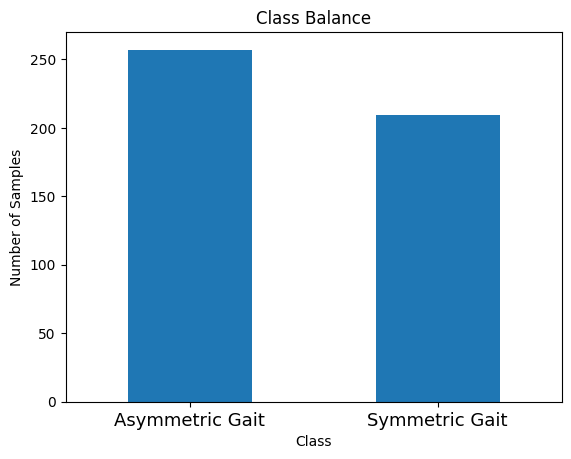

In [20]:
# Load Dataset
time_domain_data = pd.read_csv("detection_time_domain.csv")

# Filter for Gait Windows Only (label 0 or 1)
data_time_domain_gait = time_domain_data[time_domain_data['label_moderate'].isin([0, 1])].copy()
target_variable = 'label_moderate'

# Calculate class frequencies
class_counts = data_time_domain_gait[target_variable].value_counts()
bars = ['Asymmetric Gait', 'Symmetric Gait']
labels_position = np.arange(len(bars))


# Visualize class distribution
class_counts.plot(kind='bar')
plt.title('Class Balance')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(labels_position, bars, rotation=360, fontsize='13')
plt.show()


Training model: Random Forest
              precision    recall  f1-score   support

           0      0.459     0.292     0.357       209
           1      0.556     0.720     0.627       257

    accuracy                          0.528       466
   macro avg      0.507     0.506     0.492       466
weighted avg      0.512     0.528     0.506       466


Training model: Logistic Regression
              precision    recall  f1-score   support

           0      0.430     0.206     0.278       209
           1      0.546     0.778     0.642       257

    accuracy                          0.521       466
   macro avg      0.488     0.492     0.460       466
weighted avg      0.494     0.521     0.479       466


Training model: Gradient Boosting
              precision    recall  f1-score   support

           0      0.431     0.297     0.351       209
           1      0.543     0.681     0.604       257

    accuracy                          0.509       466
   macro avg      0.487  

,accuracy,f1_score_asymmetry,precision_asymmetry,recall_asymmetry
SVM (linear),0.525751,0.663623,0.545000,0.848249
Logistic Regression,0.521459,0.642055,0.546448,0.778210
Random Forest,0.527897,0.627119,0.555556,0.719844
MLP,0.540773,0.620567,0.570033,0.680934
Gradient Boosting,0.508584,0.604491,0.543478,0.680934
XGBoost,0.515021,0.600707,0.550162,0.661479


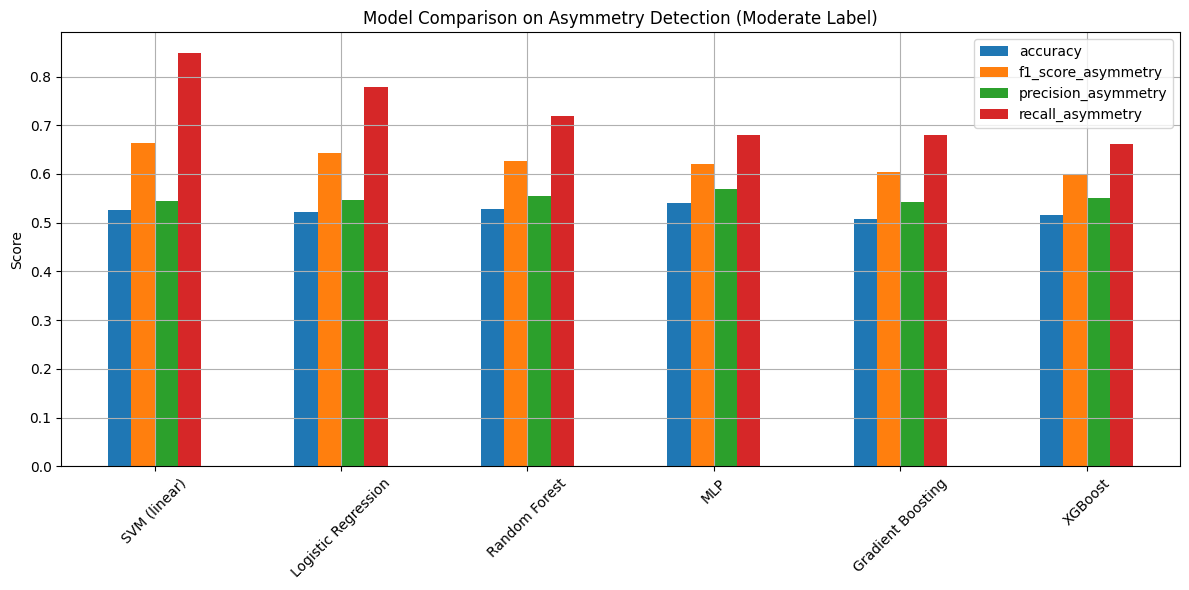

In [24]:
# Define Features and Labels
feature_cols = [
    'gyro-right-z-axis-max', 'gyro-left-z-axis-max',
    'gyro-right-z-axis-min', 'gyro-left-z-axis-min',
    'accel-right-z-axis-max', 'accel-left-z-axis-max',
    'accel-right-z-axis-min', 'accel-left-z-axis-min'
]

X = data_time_domain_gait[feature_cols].values
y = data_time_domain_gait['label_moderate'].values
groups = data_time_domain_gait['patient_id'].values

# Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cross-Validation Setup
gkf = GroupKFold(n_splits=5)

# Define All Models to Compare
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Gradient Boosting": GradientBoostingClassifier(),
    "MLP": MLPClassifier(hidden_layer_sizes=(50,), max_iter=3000, alpha=1e-4),
    "SVM (linear)": SVC(kernel='linear', probability=True),
    "XGBoost": xgb.XGBClassifier(eval_metric='logloss')
}


# Train and Evaluate All Models
results = {}

for name, model in models.items():
    print(f"\nTraining model: {name}")
    y_true_all, y_pred_all = [], []

    # Training and Evaluation
    for fold, (train_idx, test_idx) in enumerate(gkf.split(X_scaled, y, groups)):
            model.fit(X_scaled[train_idx], y[train_idx])
            y_pred = model.predict(X_scaled[test_idx])
            y_true_all.extend(y[test_idx])
            y_pred_all.extend(y_pred)
            
    report = classification_report(y_true_all, y_pred_all, output_dict=True)
    results[name] = report
    print(classification_report(y_true_all, y_pred_all, digits=3))



# Compare Models (Accuracy and F1)
summary = pd.DataFrame({
    model: {
        "accuracy": results[model]["accuracy"],
        "f1_score_asymmetry": results[model]["1"]["f1-score"],
        "precision_asymmetry": results[model]["1"]["precision"],
        "recall_asymmetry": results[model]["1"]["recall"]
    }
    for model in results
}).T


summary = summary.sort_values(by="f1_score_asymmetry", ascending=False)
print("\n Model Comparison Summary:")
display(summary)

# ## Plot Summary
summary.plot(kind="bar", figsize=(12,6))
plt.title("Model Comparison on Asymmetry Detection (Moderate Label)")
plt.ylabel("Score")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2. Stride times Asymmetry values

## 3. Raw data values

In [ ]:
clean_extra_files(healthy_dir)
clean_extra_files(stroke_dir)